##  CASE STUDY 2

# CREDIT DATA HACKATHON

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate

## Read File

In [3]:
df=pd.read_csv(r"C:\Users\ALFIN\Downloads\NIIT PYTHON\DS1_C5_S4_Credit_Data_Hackathon Case Study 2.csv")

In [4]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


In [6]:
df.shape

(100000, 24)

In [7]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

In [8]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

In [9]:
df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

#  Missing value treatment

In [5]:
missing_value_treatment=['OCCUPATION_TYPE','NAME_TYPE_SUITE', 
                        'AMT_GOODS_PRICE','CNT_FAM_MEMBERS']

for column in missing_value_treatment:
    if df[column].dtype == 'object':
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)
    else:
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)

**Missing value treatment successful**

# Separation of categorical and numerical columns

In [10]:
#categorical and numerical columns separation
def columns_a(df):
    categorical=[]
    numerical=[]
    for column in df.columns:
        if df[column].dtype=='object':
            categorical.append(column)
        else:
            numerical.append(column)
    return categorical,numerical
categorical,numerical=columns_a(df)

print("Categorical Columns : ",categorical)
print("Numerical columns : ",numerical)

Categorical Columns :  ['NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'APPLICATION_DAY']
Numerical columns :  ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE', 'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'TOTAL_DOC_SUBMITTED']


In [11]:
cat=df.loc[:,categorical]
cat

,NAME_CONTRACT_TYPE,GENDER,Car,House,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,OCCUPATION_TYPE,APPLICATION_DAY
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,Laborers,WEDNESDAY
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,Core staff,MONDAY
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,Laborers,MONDAY
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,Laborers,WEDNESDAY
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,Core staff,THURSDAY
...,...,...,...,...,...,...,...,...,...,...
99995,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,Sales staff,MONDAY
99996,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Higher education,Married,Managers,TUESDAY
99997,Cash loans,F,Y,Y,Family,Commercial associate,Secondary / secondary special,Married,Sales staff,TUESDAY
99998,Cash loans,F,Y,N,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,Sales staff,FRIDAY


In [12]:
num=df.drop(categorical,axis=1)
num

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,CNT_FAM_MEMBERS,TOTAL_DOC_SUBMITTED
0,100002,1,0,202500.0,406597.5,351000.0,-637,1,1,0,1,0,1.0,1
1,100003,0,0,270000.0,1293502.5,1129500.0,-1188,1,1,0,1,0,2.0,1
2,100004,0,0,67500.0,135000.0,135000.0,-225,1,1,1,1,0,1.0,0
3,100006,0,0,135000.0,312682.5,297000.0,-3039,1,1,0,1,0,2.0,1
4,100007,0,0,121500.0,513000.0,513000.0,-3038,1,1,0,1,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,1,157500.0,755190.0,675000.0,-232,1,1,1,1,0,3.0,1
99996,216087,0,1,225000.0,284400.0,225000.0,-182,1,1,0,1,0,3.0,1
99997,216088,0,0,135000.0,1262583.0,1102500.0,-4805,1,1,0,1,0,2.0,1
99998,216089,0,0,135000.0,225000.0,225000.0,-340,1,1,0,1,0,2.0,2


In [7]:
def count(ax,count='no_of_rows',rotation=0):
    for bar in ax.patches:
        percentage= f'{round(bar.get_height(),2)}'
        x=bar.get_x()+bar.get_width()/2
        y=bar.get_height()
        ax.annotate(percentage,(x,y),va='bottom',ha='center',rotation=rotation)
count(ax,count='no_of_rows')

# Univariate Analysis - Categorical column

In [14]:
def info_of_categorical(df):
    for col in categorical:
        unique_values=df[col].unique()
        mode_value=df[col].mode()[0]
        missing_values=df[col].isnull().sum()

        print(f"Unique values in '{col}' are: {unique_values}")
        print(f"Mode of '{col}' is {mode_value}")
        print(f"Number of missing values in '{col}' is {missing_values}\n")

info_of_categorical(df)
#not displaying missing values present or not, because missing value treatment have done so missing values are present.

Unique values in 'NAME_CONTRACT_TYPE' are: ['Cash loans' 'Revolving loans']
Mode of 'NAME_CONTRACT_TYPE' is Cash loans
Number of missing values in 'NAME_CONTRACT_TYPE' is 0

Unique values in 'GENDER' are: ['M' 'F' 'XNA']
Mode of 'GENDER' is F
Number of missing values in 'GENDER' is 0

Unique values in 'Car' are: ['N' 'Y']
Mode of 'Car' is N
Number of missing values in 'Car' is 0

Unique values in 'House' are: ['Y' 'N']
Mode of 'House' is Y
Number of missing values in 'House' is 0

Unique values in 'NAME_TYPE_SUITE' are: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
Mode of 'NAME_TYPE_SUITE' is Unaccompanied
Number of missing values in 'NAME_TYPE_SUITE' is 0

Unique values in 'NAME_INCOME_TYPE' are: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Mode of 'NAME_INCOME_TYPE' is Working
Number of missing values in 'NAME_INCOME_TYPE' is 0

Unique values in 'NAME_EDUCATION_

In [15]:
cat.columns

Index(['NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'OCCUPATION_TYPE', 'APPLICATION_DAY'],
      dtype='object')

# NAME_CONTRACT_TYPE

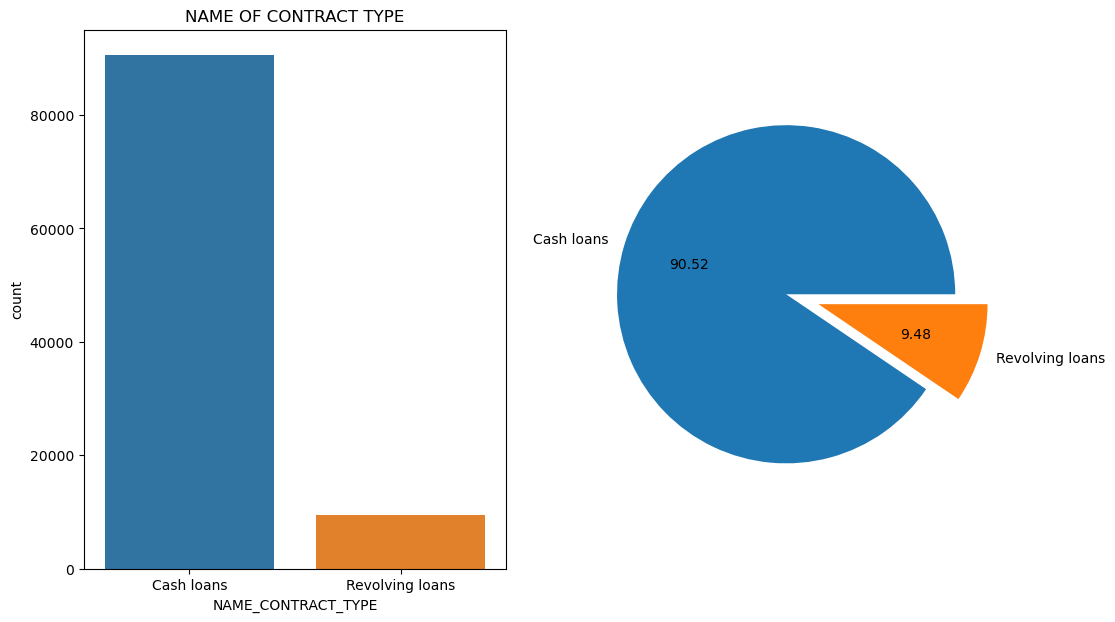

In [14]:
fig,ax=plt.subplots(1,2,figsize=(12,7))
ax[0].set_title('NAME OF CONTRACT TYPE')
percentage=df['NAME_CONTRACT_TYPE'].value_counts()
labels= list(df['NAME_CONTRACT_TYPE'].value_counts().index)
sb.countplot(x=df['NAME_CONTRACT_TYPE'],ax=ax[0],linewidth=2,linestyle='-')
plt.pie(percentage,labels=labels,explode=[0.1,0.1],autopct='%.2f')
plt.show()

# GENDER

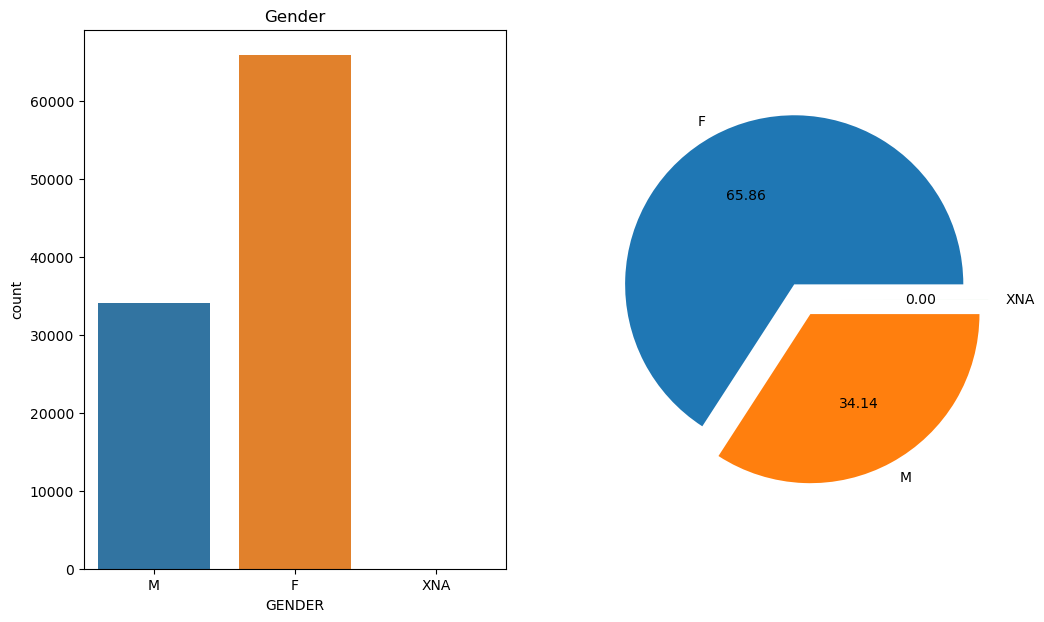

In [15]:
fig,ax=plt.subplots(1,2,figsize=(12,7))
ax[0].set_title('Gender')
percentage=df['GENDER'].value_counts()
labels= list(df['GENDER'].value_counts().index)
sb.countplot(x=df['GENDER'],ax=ax[0],linewidth=2,linestyle='-')
plt.pie(percentage,labels=labels,explode=[0.1,0.1,0.1],autopct='%.2f')
plt.show()

# CAR

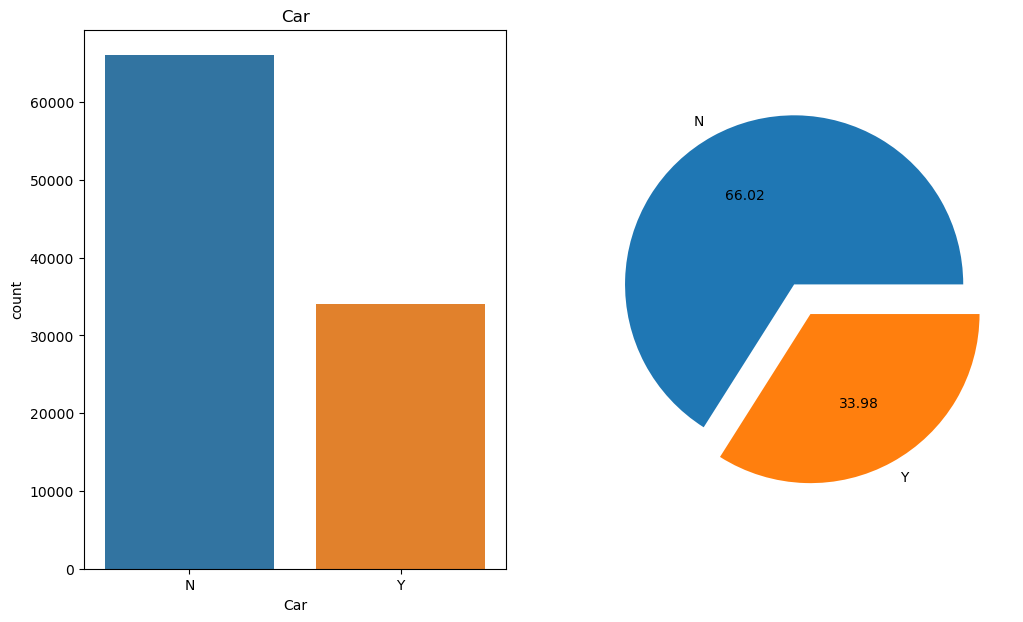

In [16]:
fig,ax=plt.subplots(1,2,figsize=(12,7))
ax[0].set_title('Car')
percentage=df['Car'].value_counts()
labels= list(df['Car'].value_counts().index)
sb.countplot(x=df['Car'],ax=ax[0],linewidth=2,linestyle='-')
plt.pie(percentage,labels=labels,explode=[0.1,0.1],autopct='%.2f')
plt.show()

# House

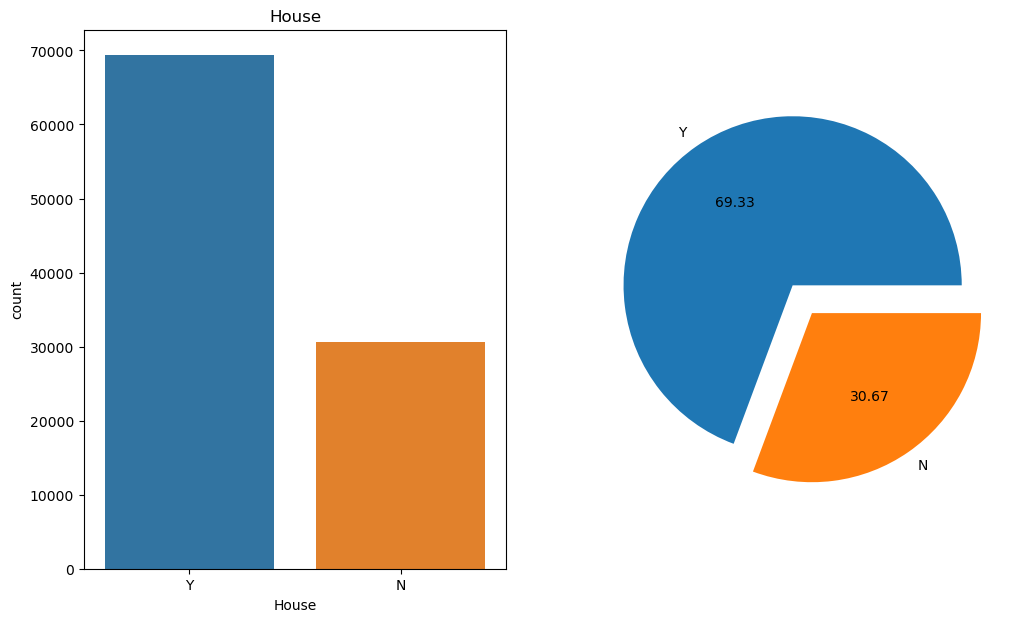

In [17]:
fig,ax=plt.subplots(1,2,figsize=(12,7))
ax[0].set_title('House')
percentage=df['House'].value_counts()
labels= list(df['House'].value_counts().index)
sb.countplot(x=df['House'],ax=ax[0],linewidth=2,linestyle='-')
plt.pie(percentage,labels=labels,explode=[0.1,0.1],autopct='%.2f')
plt.show()

# NAME_TYPE_SUITE

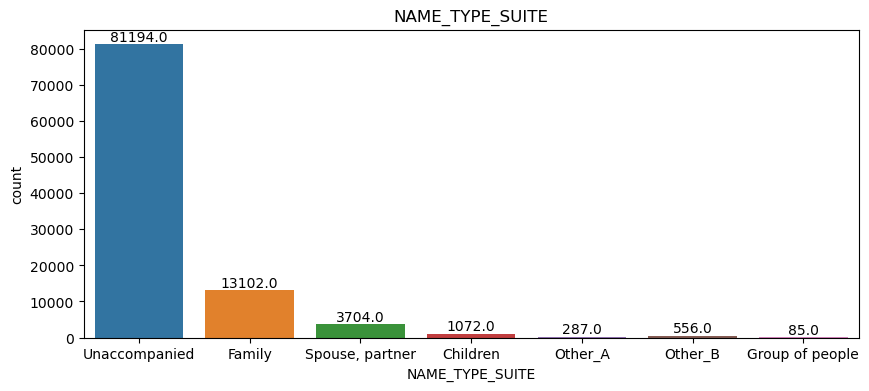

<Figure size 640x480 with 0 Axes>

In [16]:
fig,ax=plt.subplots(figsize=(10,4))
ax=sb.countplot(x=cat['NAME_TYPE_SUITE'])
plt.title('NAME_TYPE_SUITE')
for bar in ax.patches:
    count=f"{bar.get_height()}"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(count,(x,y),va='bottom',ha='center')
plt.show()
o=cat['NAME_TYPE_SUITE'].value_counts().index
q=cat['NAME_TYPE_SUITE'].value_counts().values
plt.tight_layout()
plt.show()

# NAME_EDUCATION_TYPE

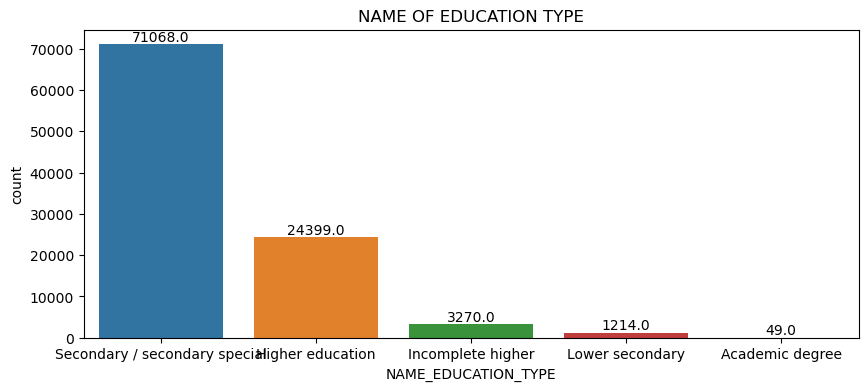

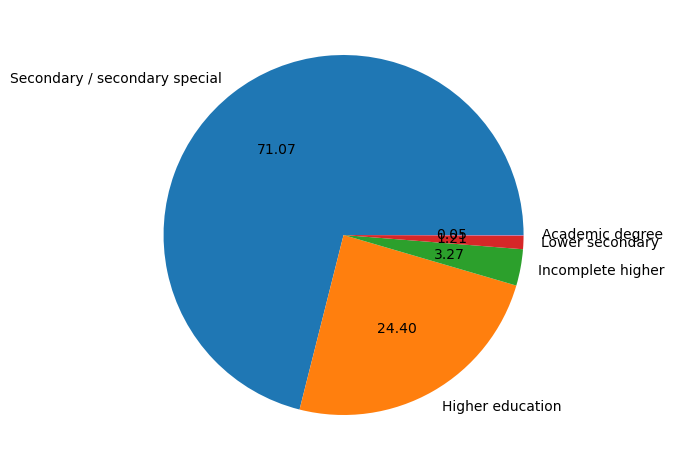

In [19]:
fig,ax=plt.subplots(figsize=(10,4))
ax=sb.countplot(x=cat['NAME_EDUCATION_TYPE'])
plt.title('NAME OF EDUCATION TYPE')
for bar in ax.patches:
    count=f"{bar.get_height()}"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(count,(x,y),va='bottom',ha='center')
plt.show()
o=cat['NAME_EDUCATION_TYPE'].value_counts().index
q=cat['NAME_EDUCATION_TYPE'].value_counts().values
plt.pie(x=q,labels=o,autopct='%.2f')
plt.tight_layout()
plt.show()

# NAME_FAMILY_STATUS

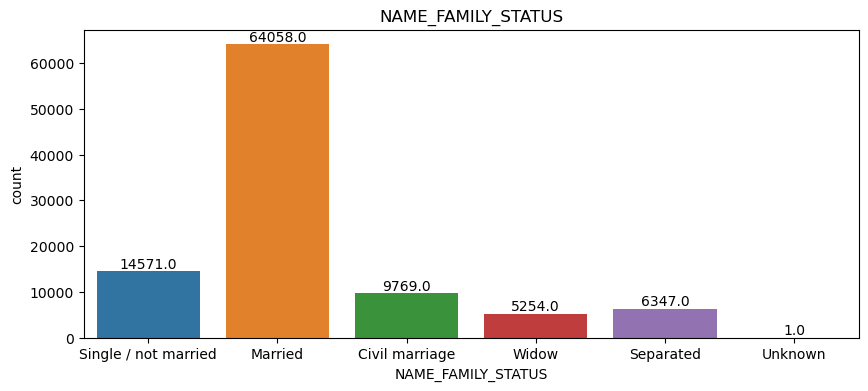

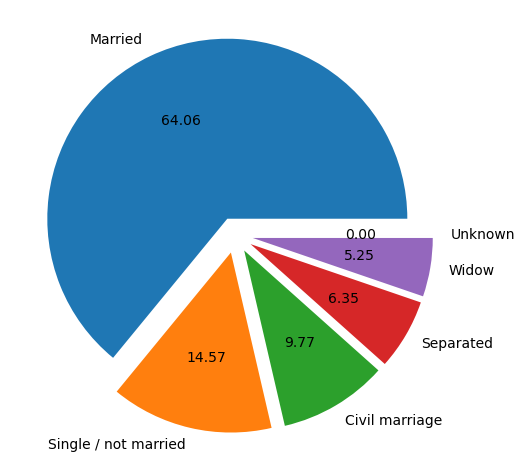

In [20]:
fig,ax=plt.subplots(figsize=(10,4))
ax=sb.countplot(x=cat['NAME_FAMILY_STATUS'])
plt.title('NAME_FAMILY_STATUS')
for bar in ax.patches:
    count=f"{bar.get_height()}"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(count,(x,y),va='bottom',ha='center')
plt.show()
o=cat['NAME_FAMILY_STATUS'].value_counts().index
q=cat['NAME_FAMILY_STATUS'].value_counts().values
plt.pie(x=q,labels=o,autopct='%.2f',explode=[0.1,0.1,0.1,0.1,0.1,0.1])
plt.tight_layout()
plt.show()

# OCCUPATION_TYPE

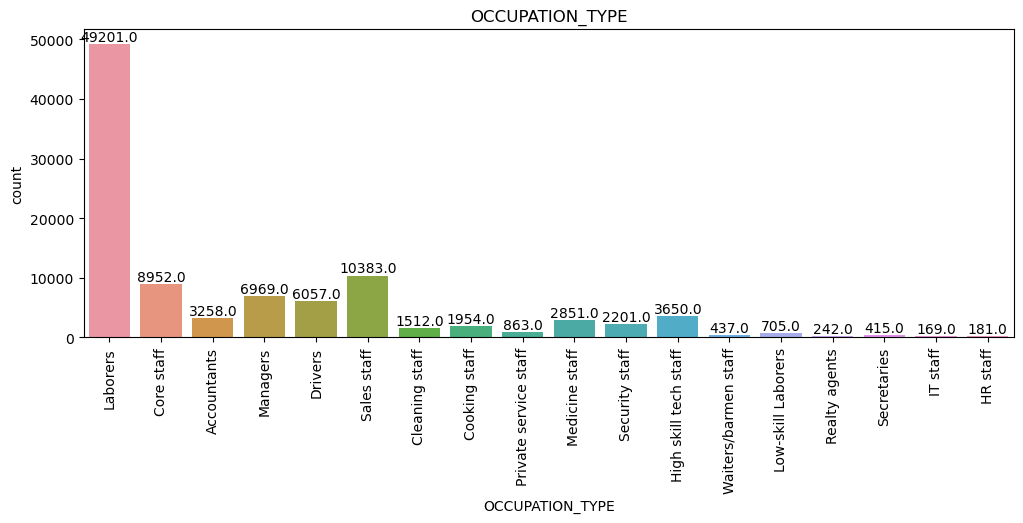

<Figure size 640x480 with 0 Axes>

In [22]:
fig,ax=plt.subplots(figsize=(12,4))
ax=sb.countplot(x=cat['OCCUPATION_TYPE'])
plt.title('OCCUPATION_TYPE')
plt.xticks(rotation=90)
for bar in ax.patches:
    count=f"{bar.get_height()}"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(count,(x,y),va='bottom',ha='center')
plt.show()
o=cat['OCCUPATION_TYPE'].value_counts().index
q=cat['OCCUPATION_TYPE'].value_counts().values
plt.tight_layout()
plt.show()

# APPLICATION_DAY

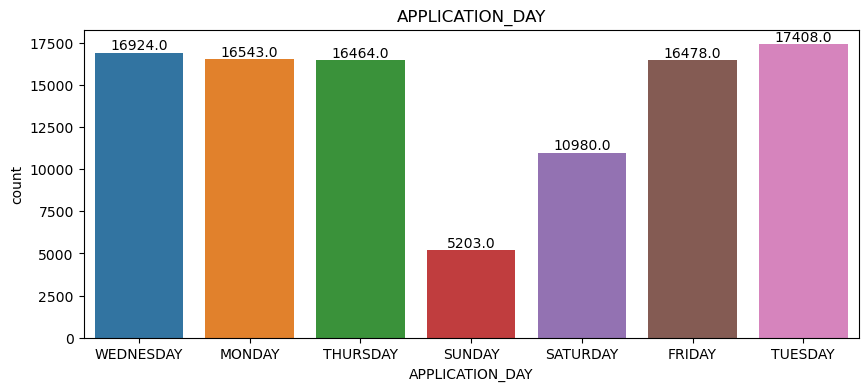

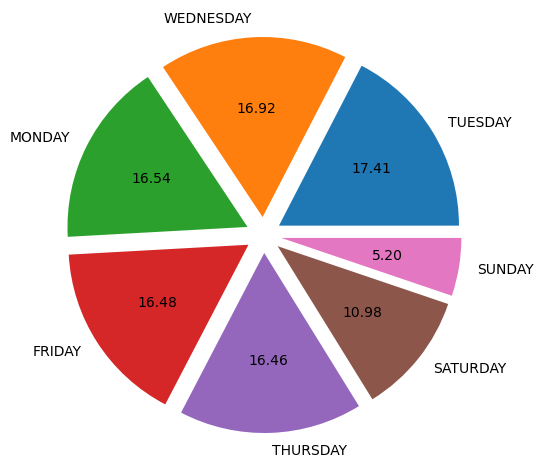

In [22]:
fig,ax=plt.subplots(figsize=(10,4))
ax=sb.countplot(x=cat['APPLICATION_DAY'])
plt.title('APPLICATION_DAY')
#plt.xticks(rotation=90)
for bar in ax.patches:
    count=f"{bar.get_height()}"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(count,(x,y),va='bottom',ha='center')
plt.show()
o=cat['APPLICATION_DAY'].value_counts().index
q=cat['APPLICATION_DAY'].value_counts().values
plt.pie(x=q,labels=o,autopct='%.2f',explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1])
plt.tight_layout()
plt.show()

# Univariate Analysis of Numerical Columns

In [23]:
num.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   CNT_CHILDREN         100000 non-null  int64  
 3   AMT_INCOME_TOTAL     100000 non-null  float64
 4   AMT_CREDIT           100000 non-null  float64
 5   AMT_GOODS_PRICE      100000 non-null  float64
 6   DAYS_EMPLOYED        100000 non-null  int64  
 7   MOBILE               100000 non-null  int64  
 8   WORK_PHONE           100000 non-null  int64  
 9   HOME_PHONE           100000 non-null  int64  
 10  MOBILE_REACHABLE     100000 non-null  int64  
 11  FLAG_EMAIL           100000 non-null  int64  
 12  CNT_FAM_MEMBERS      100000 non-null  float64
 13  TOTAL_DOC_SUBMITTED  100000 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 10.7 MB


In [24]:
num.shape

(100000, 14)

In [25]:
num.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'MOBILE',
       'WORK_PHONE', 'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

## TARGET

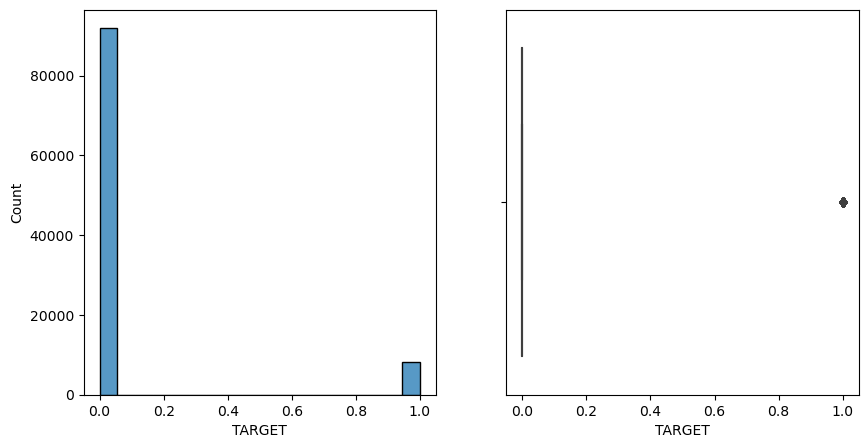

In [27]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=df['TARGET'],ax=ax[0])
sb.boxplot(x=df['TARGET'],ax=ax[1])
plt.show()

## CNT_CHILDREN

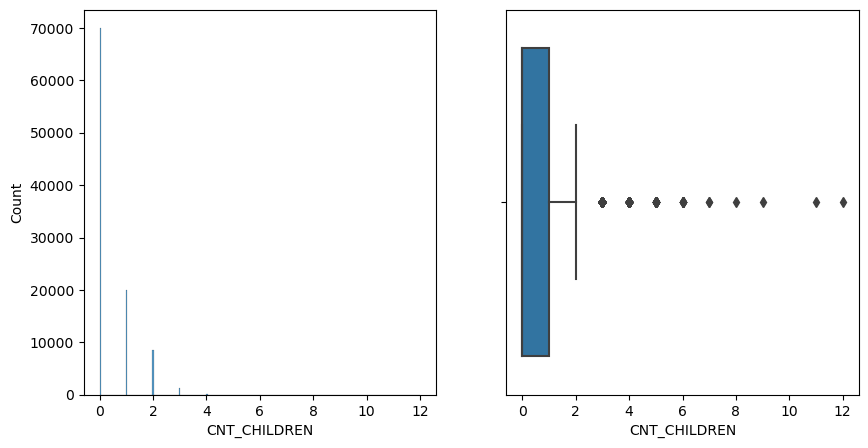

In [44]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=df['CNT_CHILDREN'],ax=ax[0])
sb.boxplot(x=df['CNT_CHILDREN'],ax=ax[1])
plt.show()

In [52]:
mean= int(df['CNT_CHILDREN'].mean())
s=df[df['CNT_CHILDREN']>=3].index
for index in s:
    df.loc[index,'CNT_CHILDREN']=mean

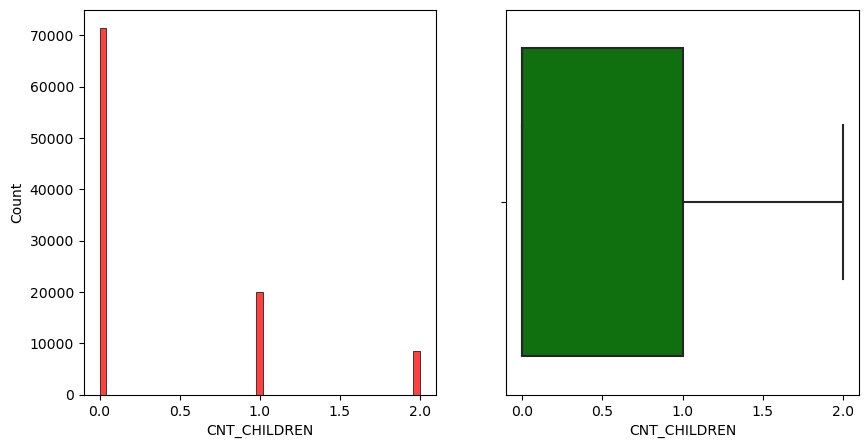

In [54]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=df['CNT_CHILDREN'],ax=ax[0],color='red')
sb.boxplot(x=df['CNT_CHILDREN'],ax=ax[1],color='green')
plt.show()

## AMT_INCOME_TOTAL

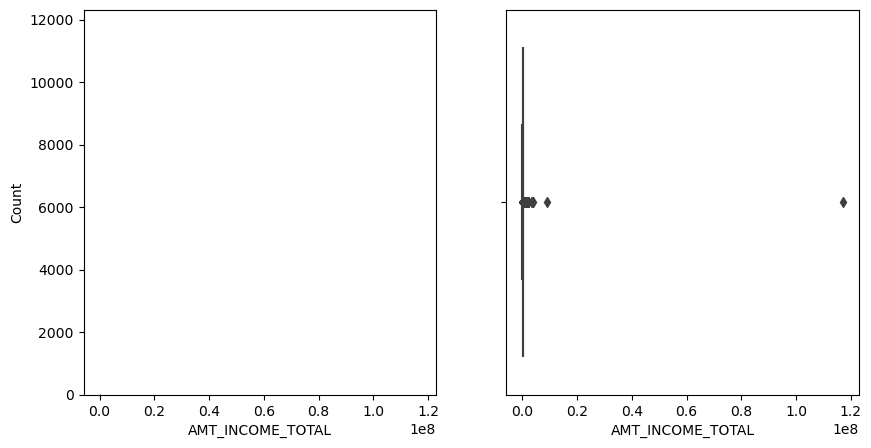

In [56]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=df['AMT_INCOME_TOTAL'],ax=ax[0])
sb.boxplot(x=df['AMT_INCOME_TOTAL'],ax=ax[1])
plt.show()

In [60]:
mean= int(df['AMT_INCOME_TOTAL'].mean())
s=df[df['AMT_INCOME_TOTAL']>=250000].index
for index in s:
    df.loc[index,'AMT_INCOME_TOTAL']=mean

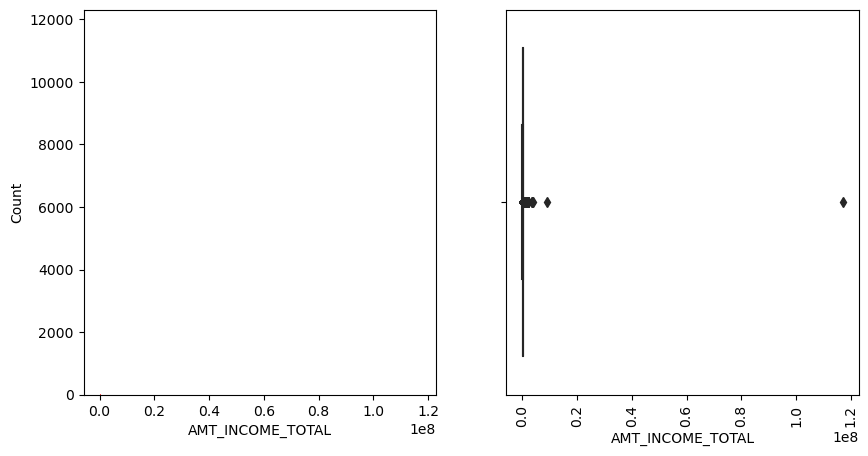

In [23]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=df['AMT_INCOME_TOTAL'],ax=ax[0],color='red')
plt.xticks(rotation=90)
sb.boxplot(x=df['AMT_INCOME_TOTAL'],ax=ax[1],color='green')
plt.show()

## AMT_CREDIT

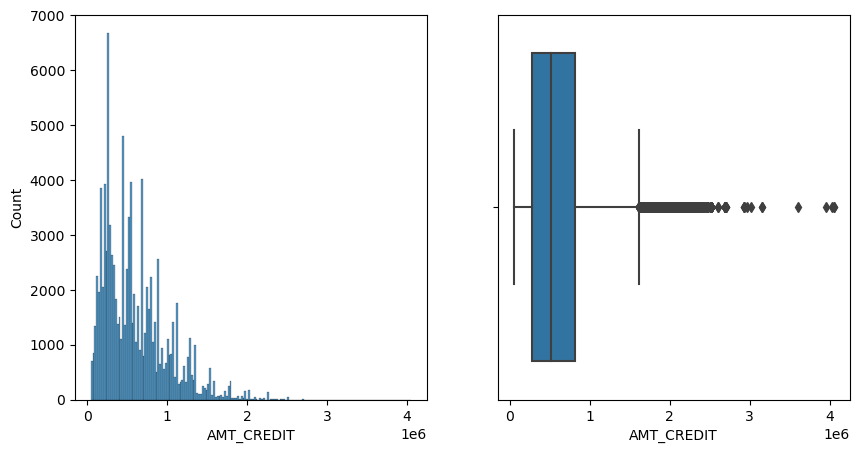

In [14]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=df['AMT_CREDIT'],ax=ax[0])
sb.boxplot(x=df['AMT_CREDIT'],ax=ax[1])
plt.show()

## AMT_GOODS_PRICE

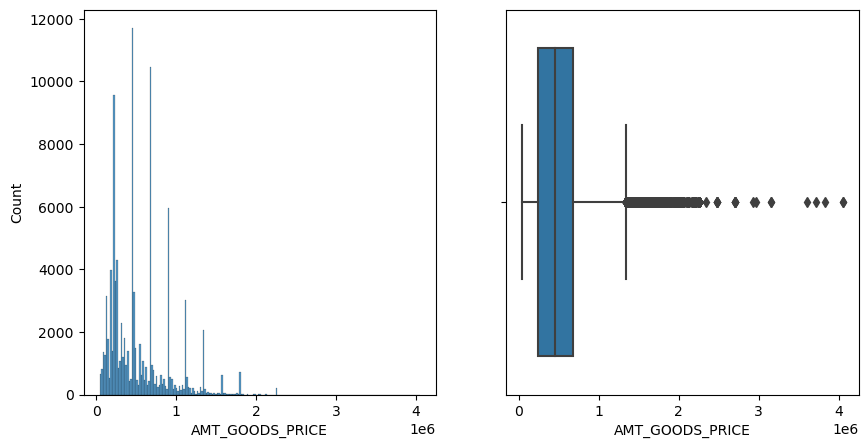

In [21]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=df['AMT_GOODS_PRICE'],ax=ax[0])
sb.boxplot(x=df['AMT_GOODS_PRICE'],ax=ax[1])
plt.show()

## DAYS_EMPLOYED

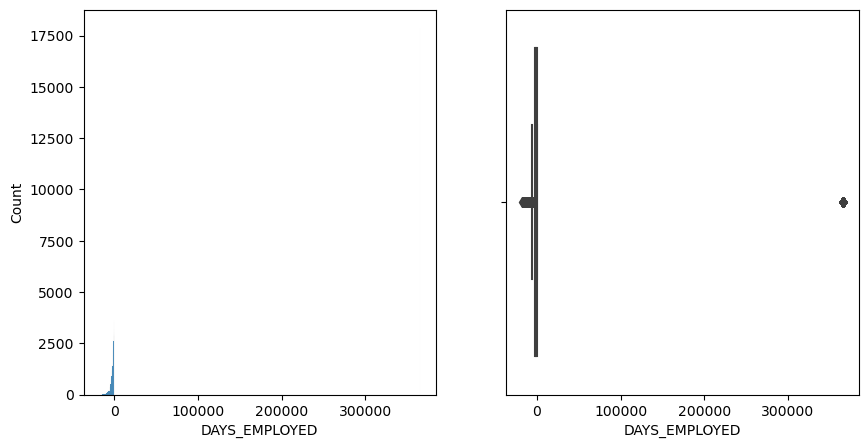

In [28]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=df['DAYS_EMPLOYED'],ax=ax[0])
sb.boxplot(x=df['DAYS_EMPLOYED'],ax=ax[1])
plt.show()

In [29]:
mean= int(df['DAYS_EMPLOYED'].mean())
s=df[df['DAYS_EMPLOYED']>=-6000].index
for index in s:
    df.loc[index,'DAYS_EMPLOYED']=mean

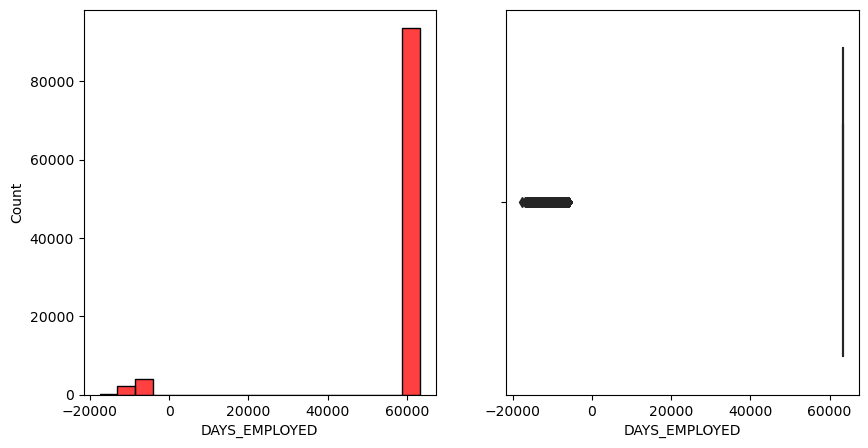

In [30]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=df['DAYS_EMPLOYED'],ax=ax[0],color='red')
sb.boxplot(x=df['DAYS_EMPLOYED'],ax=ax[1],color='green')
plt.show()

## MOBILE

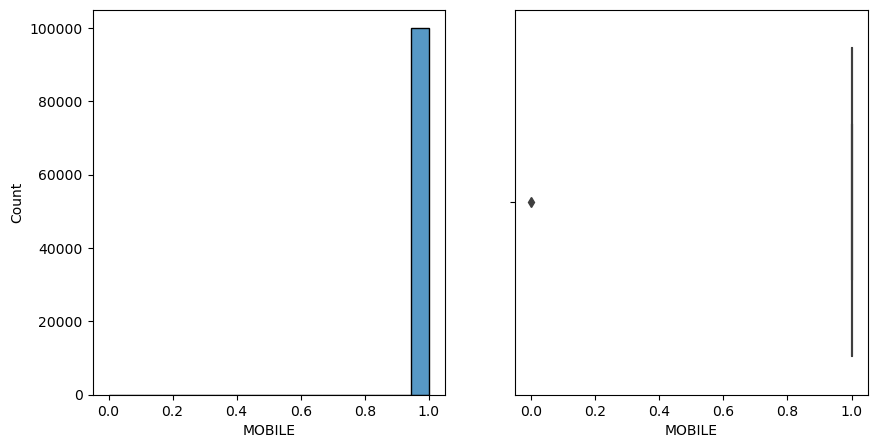

In [43]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=df['MOBILE'],ax=ax[0])
sb.boxplot(x=df['MOBILE'],ax=ax[1])
plt.show()

In [38]:
mean= int(df['MOBILE'].mean())
s=df[df['MOBILE']<=1].index
for index in s:
    df.loc[index,'MOBILE']=mean

In [39]:
df['MOBILE'].mean()

0.0

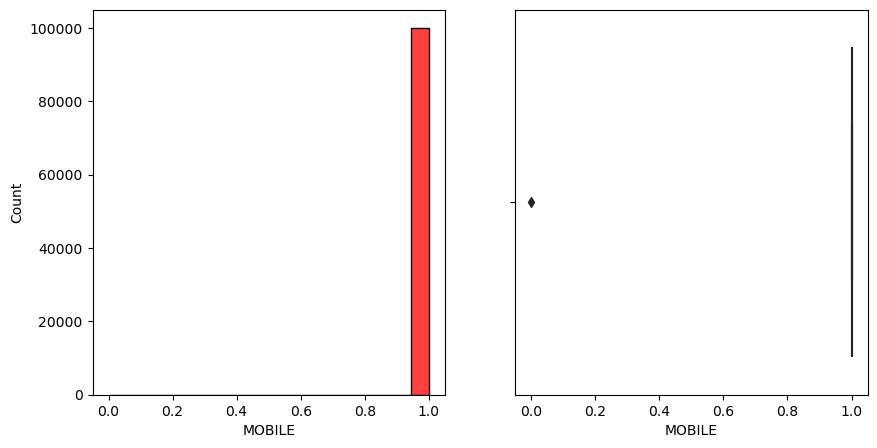

In [41]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=num['MOBILE'],ax=ax[0],color='red')
sb.boxplot(x=num['MOBILE'],ax=ax[1],color='green')
plt.show()

## WORK_PHONE

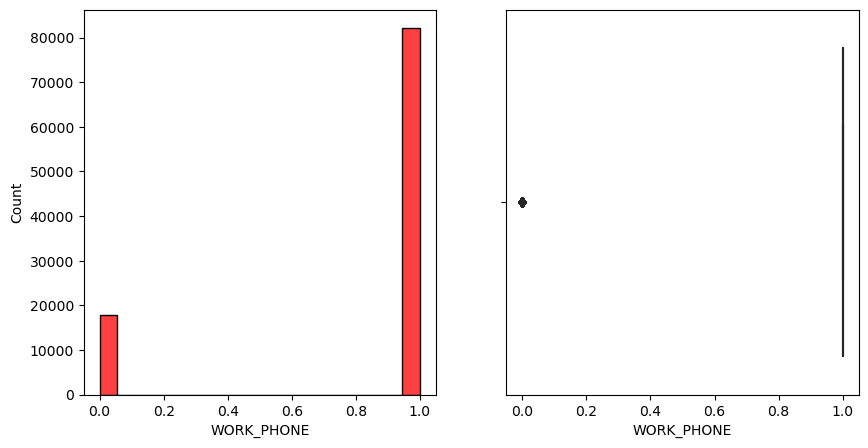

In [43]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=num['WORK_PHONE'],ax=ax[0],color='red')
sb.boxplot(x=num['WORK_PHONE'],ax=ax[1],color='green')
plt.show()

## HOME_PHONE

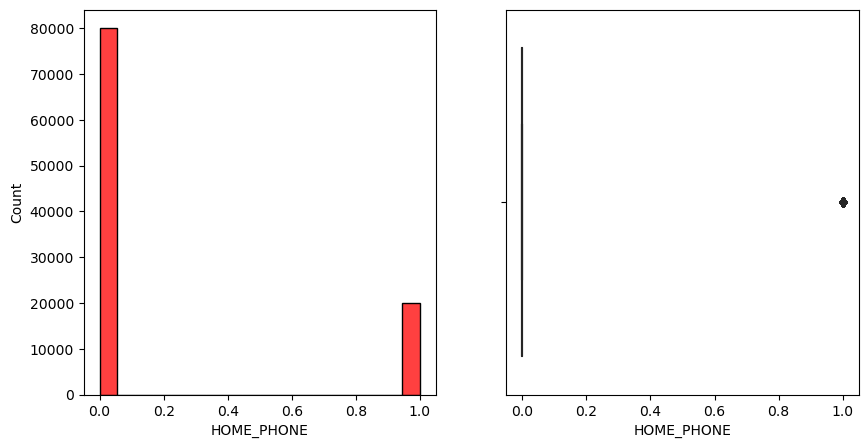

In [44]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=num['HOME_PHONE'],ax=ax[0],color='red')
sb.boxplot(x=num['HOME_PHONE'],ax=ax[1],color='green')
plt.show()

## MOBILE_REACHABLE

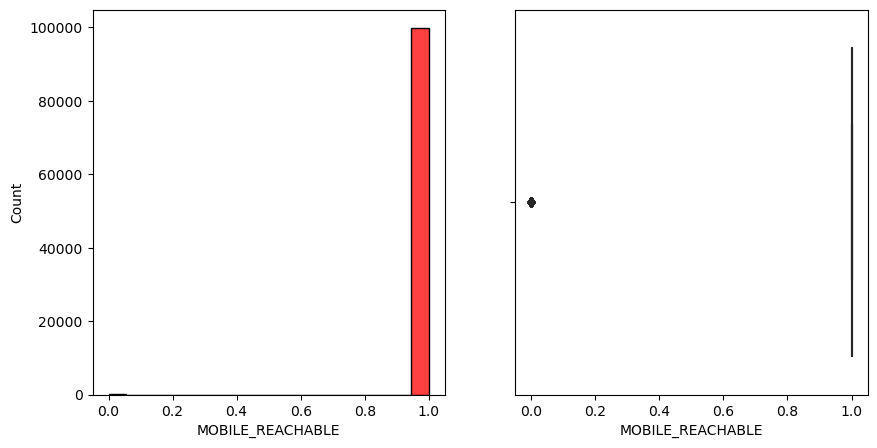

In [45]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=num['MOBILE_REACHABLE'],ax=ax[0],color='red')
sb.boxplot(x=num['MOBILE_REACHABLE'],ax=ax[1],color='green')
plt.show()

## FLAG_EMAIL

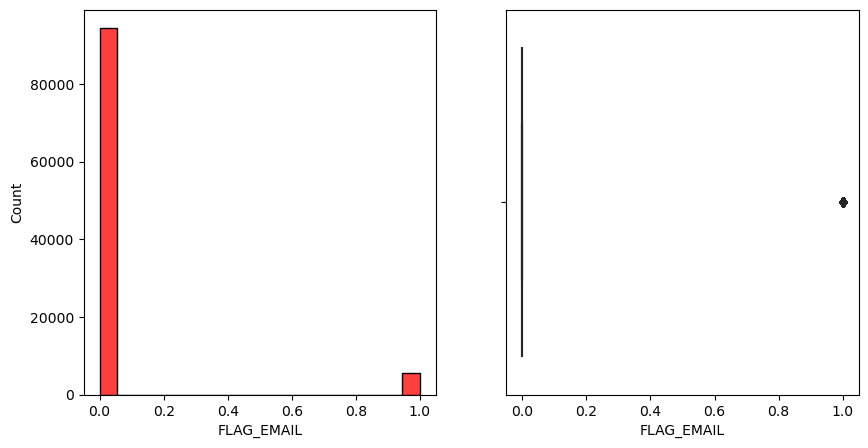

In [46]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=num['FLAG_EMAIL'],ax=ax[0],color='red')
sb.boxplot(x=num['FLAG_EMAIL'],ax=ax[1],color='green')
plt.show()

## CNT_FAM_MEMBERS

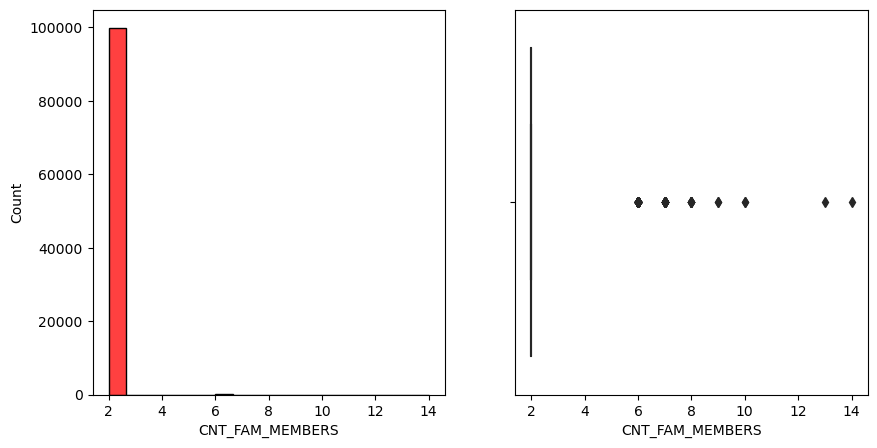

In [20]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=num['CNT_FAM_MEMBERS'],ax=ax[0],color='red')
sb.boxplot(x=num['CNT_FAM_MEMBERS'],ax=ax[1],color='green')
plt.show()

## TOTAL_DOC_SUBMITTED

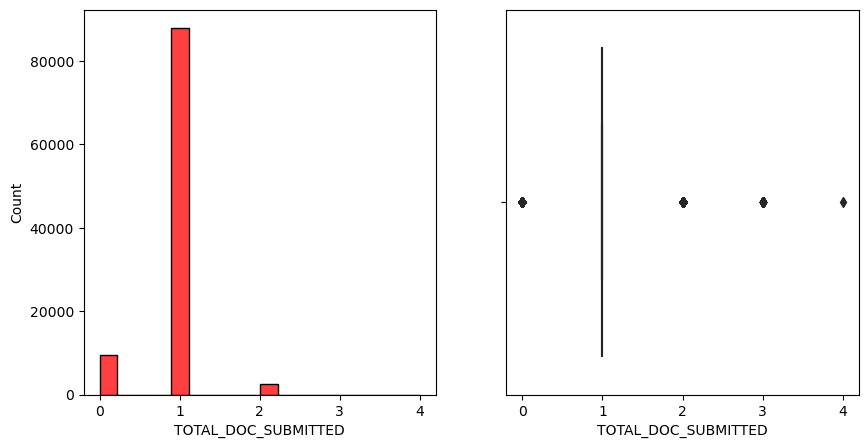

In [21]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.histplot(x=num['TOTAL_DOC_SUBMITTED'],ax=ax[0],color='red')
sb.boxplot(x=num['TOTAL_DOC_SUBMITTED'],ax=ax[1],color='green')
plt.show()

# BIVARIATE & MULTIVARIATE ANALYSIS

In [ ]:
def count(ax,count='no_of_rows'):
    for bar in ax.patches:
        percentage= f'{round(bar.get_height(),2)}'
        x=bar.get_x()+bar.get_width()/2
        y=bar.get_height()
        ax.annotate(percentage,(x,y),va='bottom',ha='center')
count(ax,count='no_of_rows')

## Does gender affect Loan Repayment

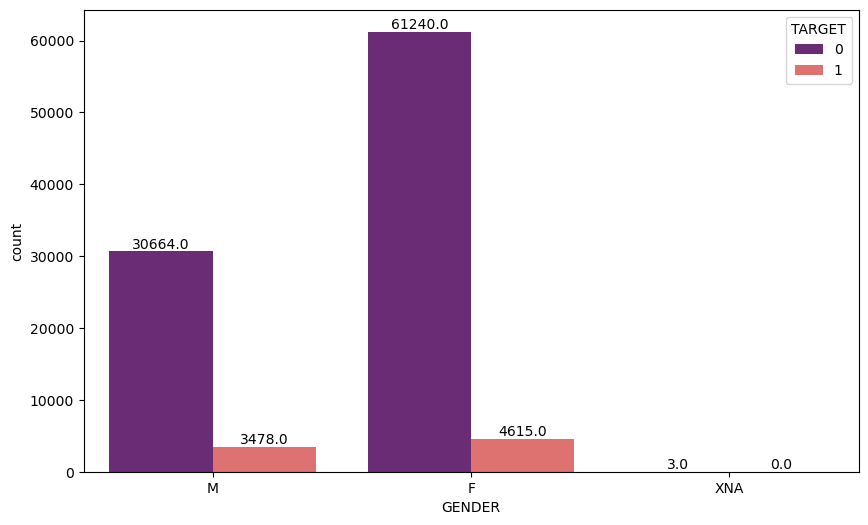

In [22]:
fig,ax=plt.subplots(figsize=(10,6))
sb.countplot(x='GENDER',hue='TARGET',data=df,palette='magma')
count(ax,df)
plt.show()

**Here we can see that mostly males are less defaulters than females.**

## Does employment type influence loan repayment?

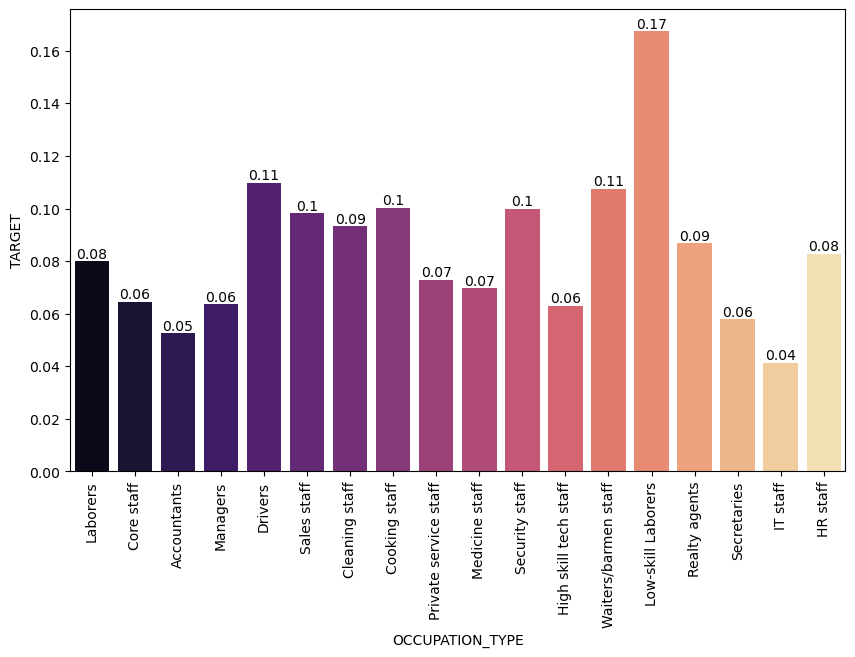

In [41]:
fig,ax=plt.subplots(figsize=(10,6))
sb.barplot(x='OCCUPATION_TYPE',y='TARGET',data=df,palette='magma',ci=False)
plt.xticks(rotation=90)
count(ax,df)
plt.show()

**Here we can see that IT staff, Accountants have less probability of becoming defaulters.**

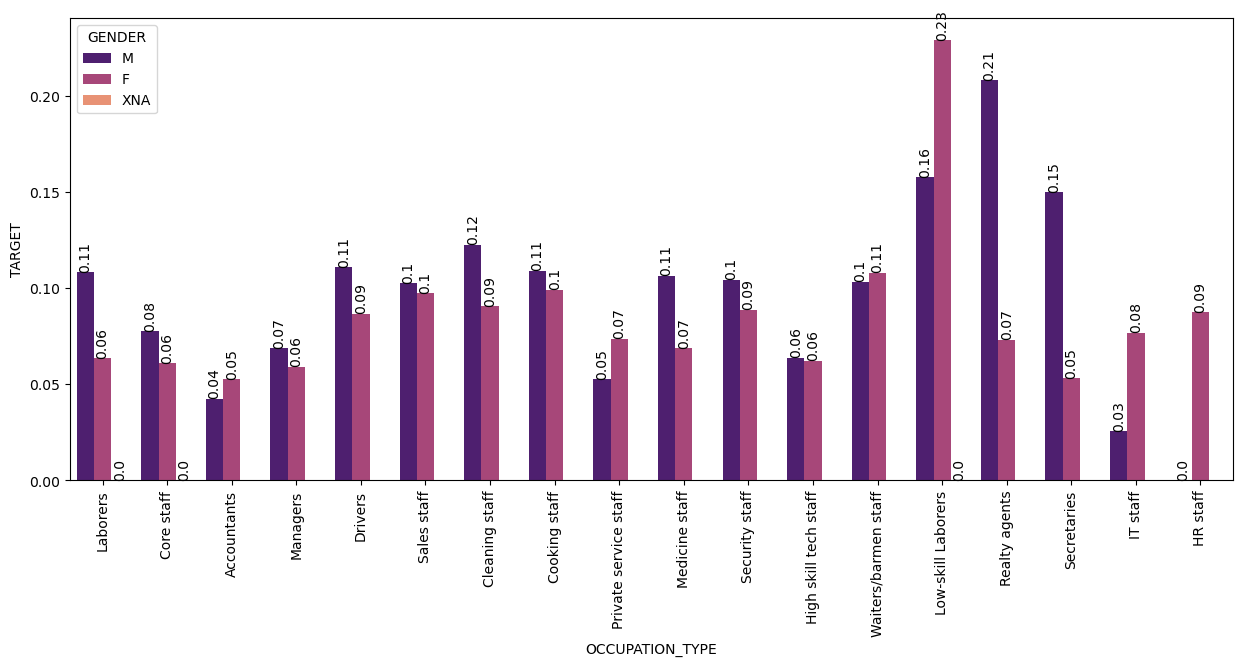

In [33]:
fig,ax=plt.subplots(figsize=(15,6))
sb.barplot(x='OCCUPATION_TYPE',y='TARGET',hue='GENDER',data=df,palette='magma',ci=False)
plt.xticks(rotation=90)
count(ax,df,rotation=90)
plt.show()

**Here we can see that most of the IT staffs and less defaulters are males.**

## Does family size affect loan repayment?

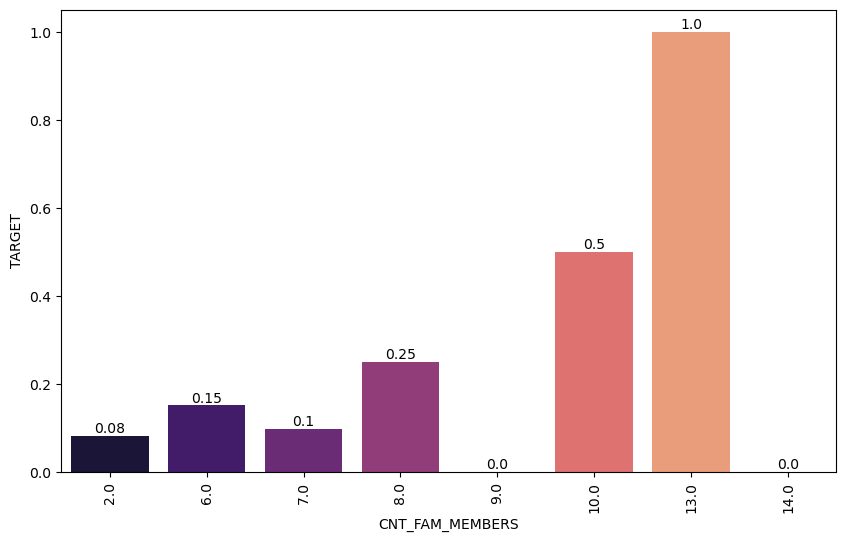

In [44]:
fig,ax=plt.subplots(figsize=(10,6))
sb.barplot(x='CNT_FAM_MEMBERS',y='TARGET',data=df,palette='magma',ci=False)
plt.xticks(rotation=90)
count(ax,df)
plt.show()

**Here we can see that as family size decreases, less probability of becoming defaulters.**

## Does day of application have any relation with the defaulters?

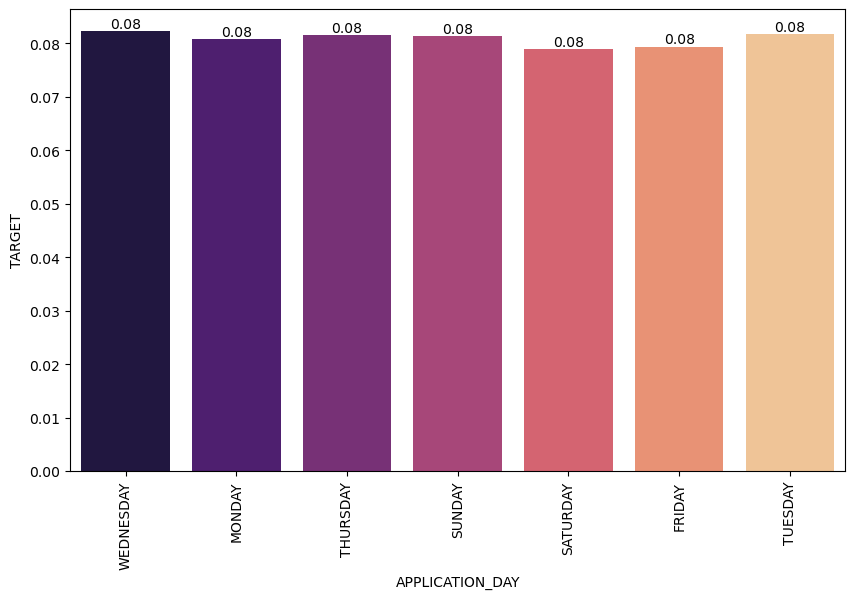

In [45]:
fig,ax=plt.subplots(figsize=(10,6))
sb.barplot(x='APPLICATION_DAY',y='TARGET',data=df,palette='magma',ci=False)
plt.xticks(rotation=90)
count(ax,df)
plt.show()

Here we can see that day of application have no relation with the defaulters because all the data are same in all days

## Does loan type affect defaulters?

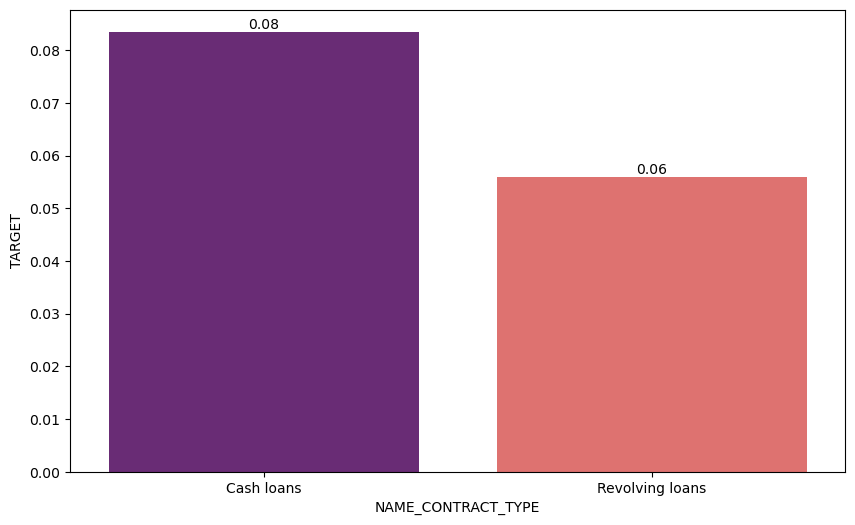

In [8]:
fig,ax=plt.subplots(figsize=(10,6))
sb.barplot(x='NAME_CONTRACT_TYPE',y='TARGET',data=df,palette='magma',ci=False)
plt.xticks(rotation=0)
count(ax,df)
plt.show()

**Revolving loans have less probability of holding defaulters.**

## Loan type by Employment type

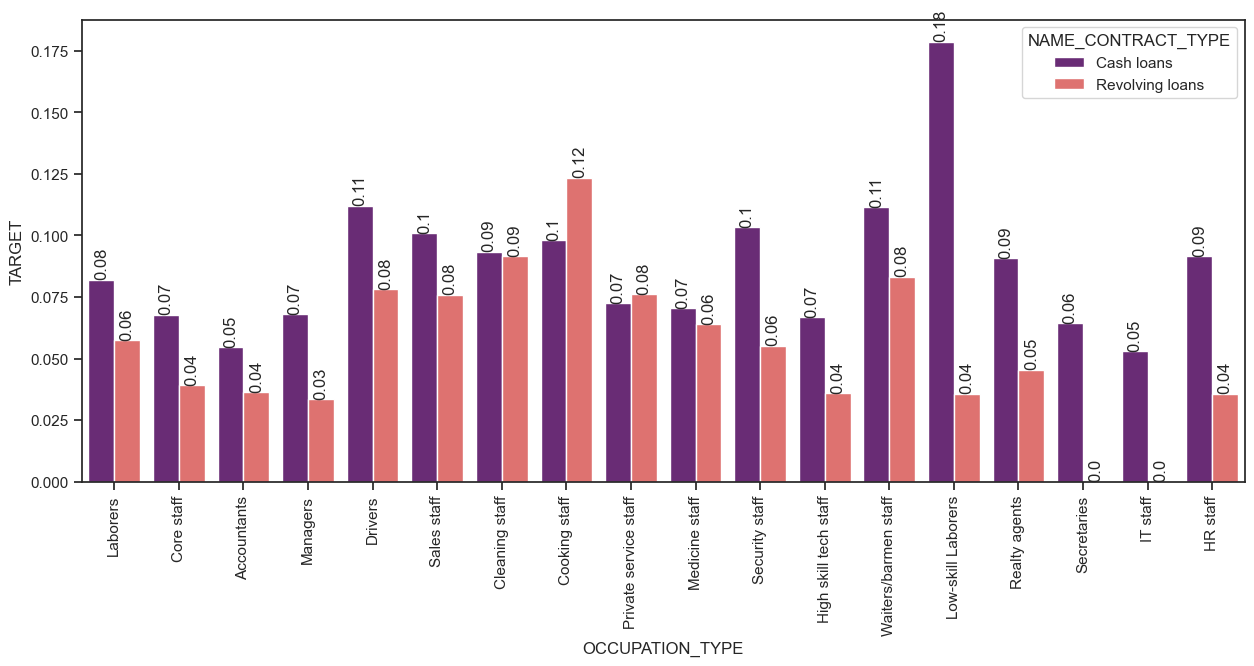

In [39]:
fig,ax=plt.subplots(figsize=(15,6))
sb.barplot(x='OCCUPATION_TYPE',y='TARGET',hue='NAME_CONTRACT_TYPE',data=df,palette='magma',ci=False)
plt.xticks(rotation=90)
count(ax,df,rotation=90)
plt.show()

**Approving revolving loan for Managers is likely to repay the loan** 

## Does having co-borrower impact default rate?

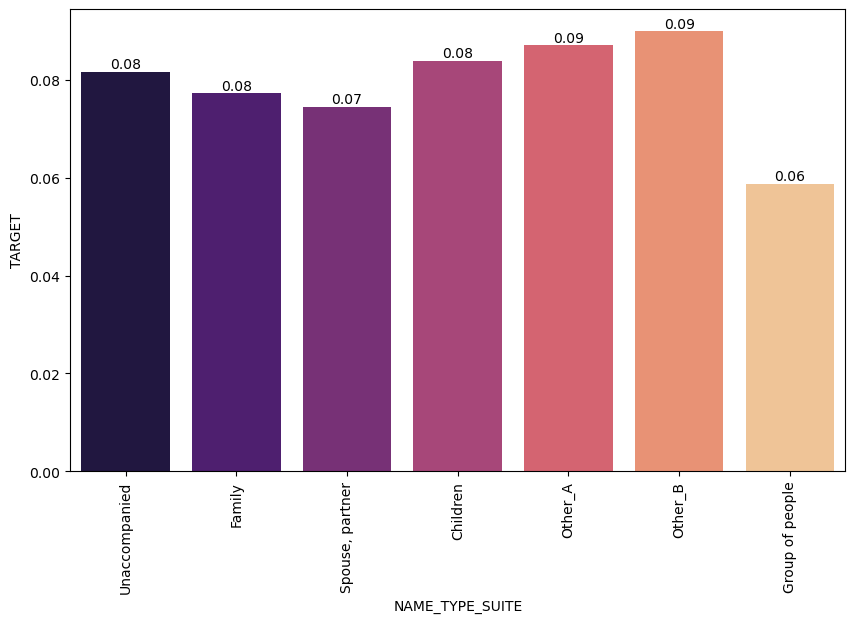

In [54]:
fig,ax=plt.subplots(figsize=(10,6))
sb.barplot(x='NAME_TYPE_SUITE',y='TO',data=df,palette='magma',ci=False)
plt.xticks(rotation=90)
count(ax,df)
plt.show()

**Here having coborrowers Group of people is more likely to repay the loan on time**

## Income by Education level

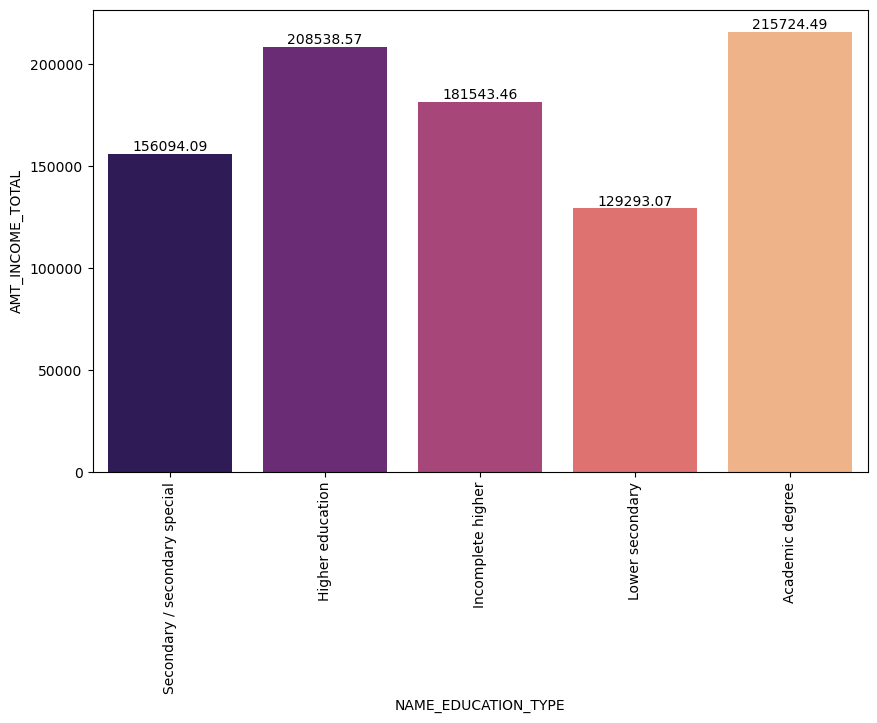

In [17]:
fig,ax=plt.subplots(figsize=(10,6))
sb.barplot(x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',data=df,palette='magma',ci=False)
plt.xticks(rotation=90)
count(ax,df)
plt.show()

**Those holding academic degree have more income, so they are more likely to repay the loan**.

## Does occupation type has any influence on credit amount.

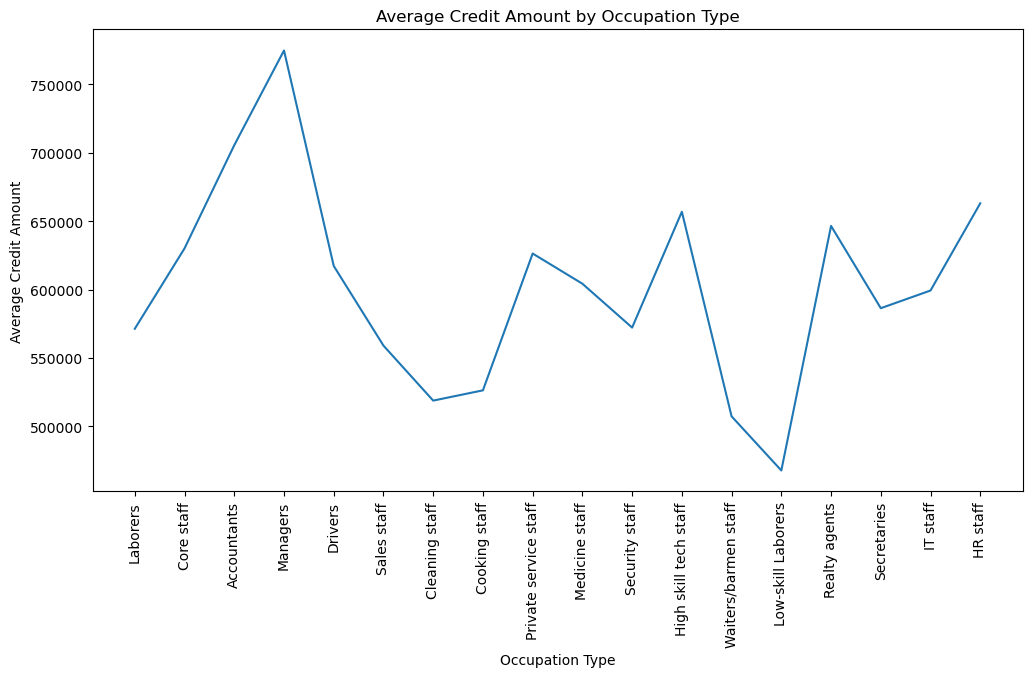

In [15]:
plt.figure(figsize=(12, 6))
sb.lineplot(data=df, x='OCCUPATION_TYPE', y='AMT_CREDIT', estimator='mean', ci=None)
plt.title('Average Credit Amount by Occupation Type')
plt.xlabel('Occupation Type')
plt.ylabel('Average Credit Amount')
plt.xticks(rotation=90)
plt.show()

**Here managers have highest credit limit**

## Is there a correlation between education level and the likelihood of being a defaulter?

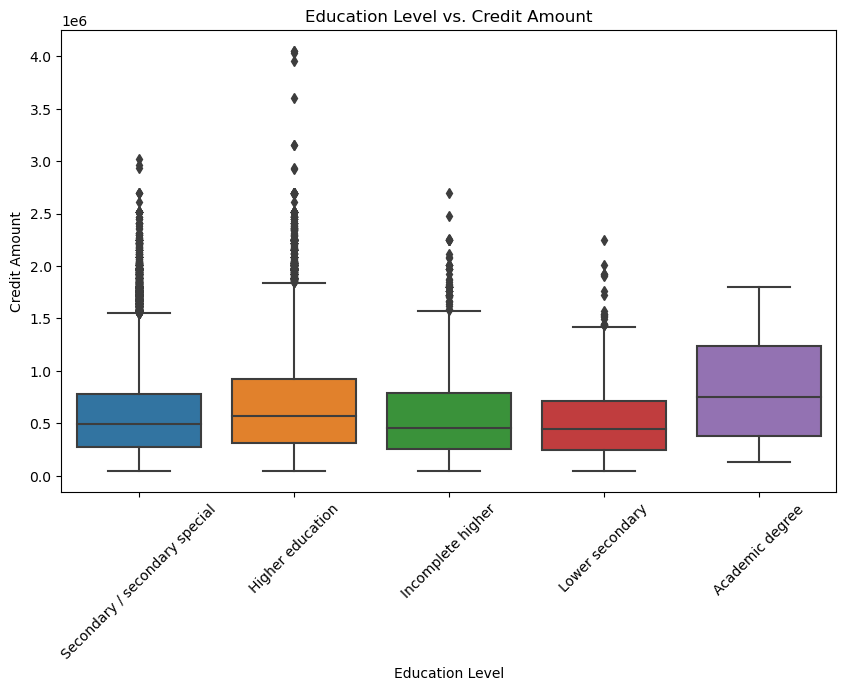

In [20]:
plt.figure(figsize=(10, 6))
sb.boxplot(data=df, x='NAME_EDUCATION_TYPE', y='AMT_CREDIT')
plt.title('Education Level vs. Credit Amount')
plt.xlabel('Education Level')
plt.ylabel('Credit Amount')
plt.xticks(rotation=45)
plt.show()

**The positive correlation in academic degree shows less probability of becoming a defaulter.**

## Is there a correlation between income and credit amount  for loan applicants with different education levels?

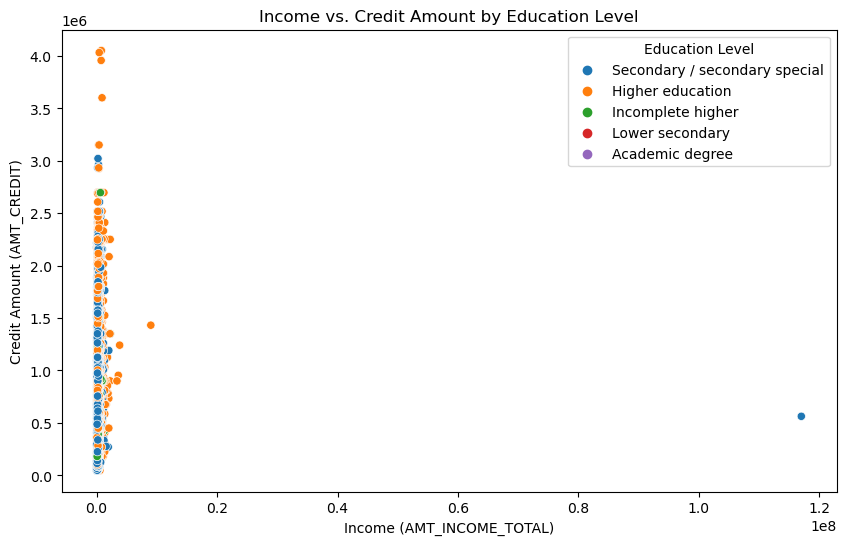

In [12]:
plt.figure(figsize=(10, 6))
sb.scatterplot(x="AMT_INCOME_TOTAL", y="AMT_CREDIT", hue="NAME_EDUCATION_TYPE", data=df)
plt.title("Income vs. Credit Amount by Education Level")
plt.xlabel("Income (AMT_INCOME_TOTAL)")
plt.ylabel("Credit Amount (AMT_CREDIT)")
plt.legend(title="Education Level")
plt.show()

**The scatter plot demonstrates a positive correlation between income and credit amount, with applicants holding higher education degrees generally receiving larger loans for similar income levels.**

##  Is there a difference in loan default rates based on whether the applicant's mobile phone is reachable and whether they have an email address?

In [18]:
pd.crosstab(df["MOBILE_REACHABLE"], df["FLAG_EMAIL"])
print(cross_tab)

FLAG_EMAIL            0     1
MOBILE_REACHABLE             
0                   177    24
1                 94204  5595


**The majority of loan applicants have reachable mobile phones, and a significant portion also have email addresses, suggesting good accessibility for communication with applicants.**

##  Is there a correlation between the applicant's income type and the loan amount requested?

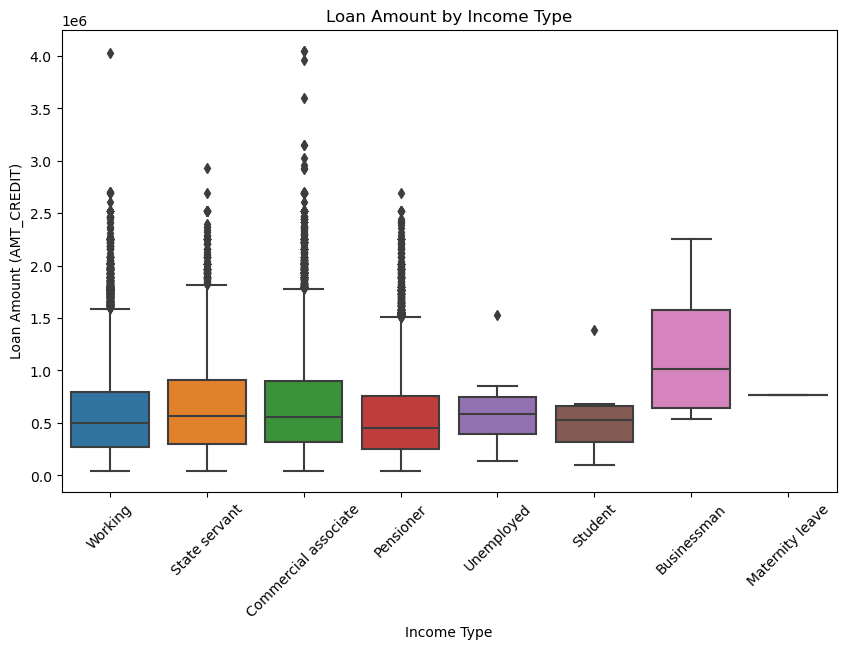

In [21]:
plt.figure(figsize=(10, 6))
sb.boxplot(x="NAME_INCOME_TYPE", y="AMT_CREDIT", data=df)
plt.title("Loan Amount by Income Type")
plt.xlabel("Income Type")
plt.ylabel("Loan Amount (AMT_CREDIT)")
plt.xticks(rotation=45)
plt.show()

**The box plot reveals variations in loan amounts based on income type, with "Commercial associate" and "Businessman" income types tending to request higher loan amounts compared to others, suggesting differences in credit needs based on income sources.**

## How does the loan default rate vary when considering the applicant's income type and education level simultaneously?

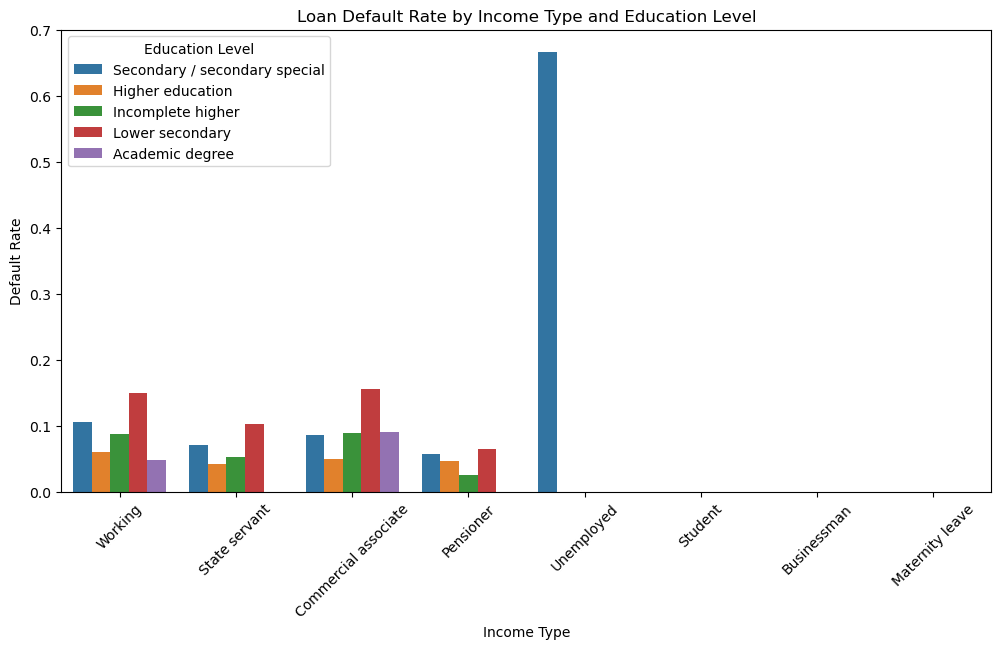

In [23]:
plt.figure(figsize=(12, 6))
sb.barplot(x="NAME_INCOME_TYPE", y="TARGET", hue="NAME_EDUCATION_TYPE", data=df, ci=None)
plt.title("Loan Default Rate by Income Type and Education Level")
plt.xlabel("Income Type")
plt.ylabel("Default Rate")
plt.xticks(rotation=45)
plt.legend(title="Education Level")
plt.show()

 **The grouped bar plot illustrates that the loan default rate varies based on both income type and education level, highlighting combinations such as "State servant" with "Higher education" having a lower default rate compared to others.**

## Are there any patterns in loan defaults based on the applicant's housing situation, employment type, and family status?



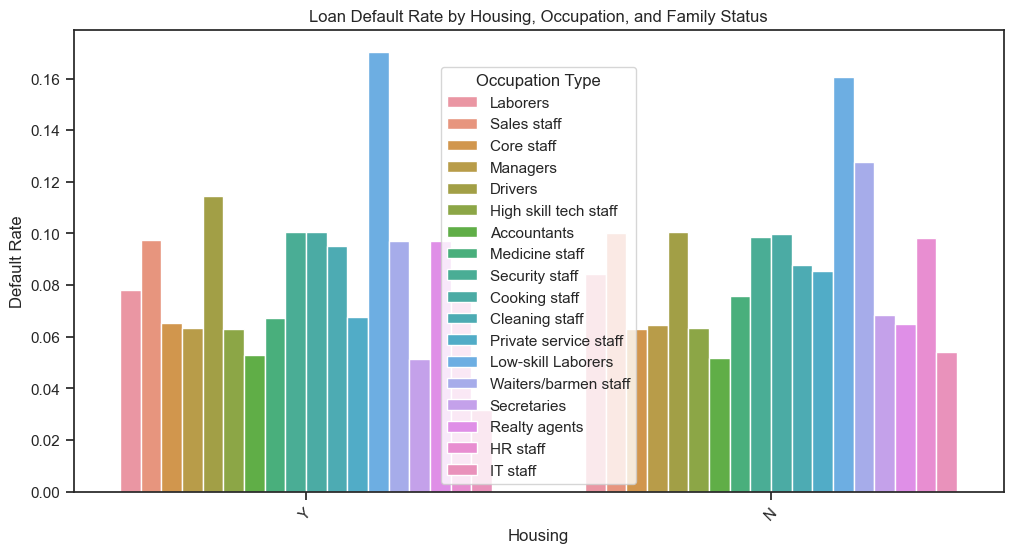

In [35]:
plt.figure(figsize=(12, 6))
sb.barplot(x="House", y="TARGET", hue="OCCUPATION_TYPE", data=df, ci=None, hue_order=df["OCCUPATION_TYPE"].value_counts().index)
plt.title("Loan Default Rate by Housing, Occupation, and Family Status")
plt.xlabel("Housing")
plt.ylabel("Default Rate")
plt.xticks(rotation=45)
plt.legend(title="Occupation Type")
plt.show()

**Secretaries and IT staffs those having house have less probability of becoming defaulters.**

## Does the applicant's education level in conjunction with the number of children and family status affect the loan default rate?

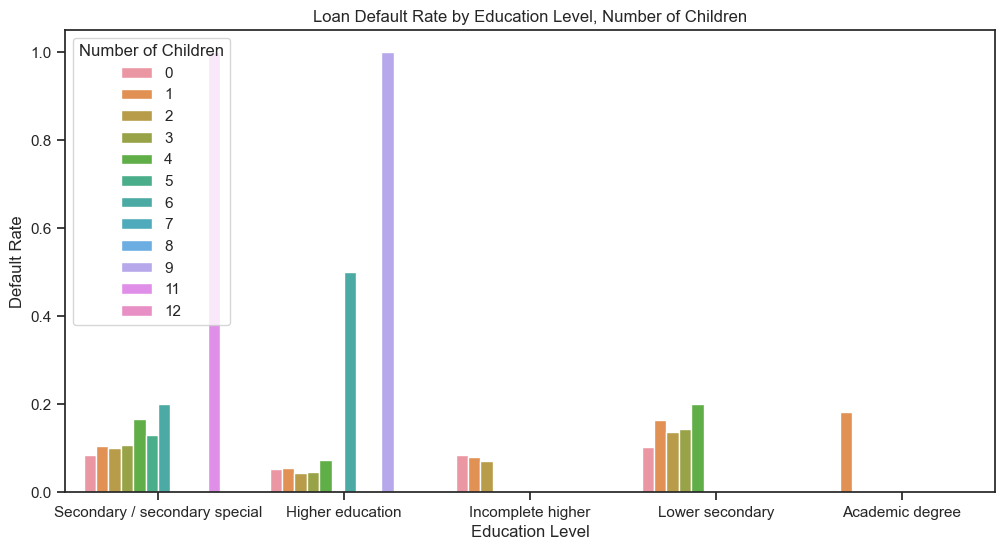

In [40]:
plt.figure(figsize=(12, 6))
sb.barplot(x="NAME_EDUCATION_TYPE", y="TARGET", hue="CNT_CHILDREN", data=df, ci=None)
plt.title("Loan Default Rate by Education Level, Number of Children")
plt.xlabel("Education Level")
plt.ylabel("Default Rate")
plt.xticks(rotation=0)
plt.legend(title="Number of Children")
plt.show()

**Those having higher education with less 4 children have less probability of becoming a defaulter.**